# Exploratory Data Analysis

## Objectives: Goals and questions

### Goal 1

Have an automatic process to discriminate between human users and Bot accounts, integrated with the GrimoireLab toolset.

#### Questions

* Q1.1. How to separate bot accounts from human users?
* Q1.2. Is the profile information from a given individual enough to classify it as human or Bot?
* Q1.3. Are there differences between the activity generated by humans and bots?

### Goal 2

Find which channels and footprints can be used to classify a user as human or Bot.

#### Questions

* Q2.1. Are there any particular channels and footprints, as a combination of interac-
tions which can be used to classify a user as human or bot?
* Q2.2. Message content (commit messages, issue texts, etc.) can be used to validate
this classification?
  + Q2.2.1. Does a richer syntax give a hint about the nature of the user?
  + Q2.2.2. Can the entropy of a comment give a hint about the nature of the user?
* Q2.3. Do working hours and frequency of contributions help on this classification?

## Analysis of the data source Git

As the Revelio tool is meant to be integrated with SortingHat, the decision was to use the unique individuals as the entry values for the classification model, which will predict if a given contributor is a bot or not.

Our first data-set is composed by single commits per author, and our new data-set needs to have one entry per contributor, which mens we need ways to represent the information from the history of commits for each author.

From the initial dataset of the whole set of commits per author, we only consider authors with more than 10 commits.

In [1]:
%%javascript
 IPython.OutputArea.prototype._should_scroll = function(lines) {
     return false;
 }

<IPython.core.display.Javascript object>

In [2]:
# Avoid to regenerate the plots if it is not needed (it takes a lot of time)
REGENERATE_PLOTS = False

In [3]:
import pandas as pd
import numpy as np

pd.options.mode.chained_assignment = None  # default='warn'

In [4]:
data_path = './datasets'
df_git = pd.read_json('{}/df_git.json'.format(data_path), orient='records', lines=True)

In [5]:
(num_rows, num_cols) = df_git.shape
print('The imported dataset contains {} rows and {} columns.'\
      .format(num_rows, num_cols))

The imported dataset contains 3347 rows and 21 columns.


In [6]:
# Make sure all the data types are correct 

convert_dict = {'git__num_commits': int,
                'git__num_repos': int,
                'git__num_merge_commits': int,
                'git__num_weekend_commits': int,
                'git__num_signed_commits': int,
                'git__ratio_merge_commits': float,
                'git__ratio_weekend_commits': float,
                'git__ratio_signed_commits': float,
                'git__median_files': float,
                'git__iqr_files': float,
                'git__median_lines_added': float,
                'git__iqr_lines_added': float,
                'git__median_lines_removed': float,
                'git__iqr_lines_removed': float,
                'git__median_len_commit_message': float,
                'git__iqr_len_commit_message': float,
                'git__median_len_words_commit_message': float,
                'git__iqr_len_words_commit_message': float,
                'author_bot': bool
               }
 
df_git = df_git.astype(convert_dict)

In [7]:
bot_df = df_git[df_git['author_bot'] == True]

In [8]:
bot_df.describe()

,git__num_merge_commits,git__num_weekend_commits,git__num_signed_commits,git__num_commits,git__num_repos,git__ratio_merge_commits,git__ratio_weekend_commits,git__ratio_signed_commits,git__median_files,git__iqr_files,git__median_lines_added,git__iqr_lines_added,git__median_lines_removed,git__iqr_lines_removed,git__median_len_commit_message,git__iqr_len_commit_message,git__median_len_words_commit_message,git__iqr_len_words_commit_message
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,3148.464286,3182.785714,1.000000,17847.392857,120.428571,0.136003,0.164957,0.031505,1.714286,2.687500,14.803571,83.223214,6.875000,27.758929,81.767857,32.625000,7.696429,3.142857
std,15489.487375,14171.891307,3.006167,71234.825262,337.244765,0.300312,0.186358,0.165312,1.802409,7.691874,40.029466,213.778413,17.443892,97.149024,53.435749,46.804533,4.090050,4.774270
min,0.000000,0.000000,0.000000,13.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,3.000000,0.000000
25%,0.000000,3.000000,0.000000,60.000000,1.000000,0.000000,0.034584,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,41.750000,0.000000,4.000000,0.000000
50%,0.000000,15.000000,0.000000,195.500000,2.000000,0.000000,0.123835,0.000000,1.000000,0.000000,2.750000,7.375000,1.000000,3.125000,69.500000,8.500000,6.000000,0.000000
75%,43.750000,215.250000,0.000000,1649.000000,6.500000,0.048543,0.191811,0.000000,2.000000,1.000000,5.125000,21.000000,3.625000,8.500000,109.875000,50.562500,10.250000,5.000000
max,82130.000000,74657.000000,14.000000,364636.000000,1133.000000,1.000000,0.894495,0.875000,7.000000,39.750000,204.000000,861.750000,72.000000,508.000000,210.000000,134.000000,18.000000,14.000000


In [9]:
df_git[df_git.columns.difference(['author_name'])].head()

,author_bot,author_uuid,git__iqr_files,git__iqr_len_commit_message,git__iqr_len_words_commit_message,git__iqr_lines_added,git__iqr_lines_removed,git__median_files,git__median_len_commit_message,git__median_len_words_commit_message,git__median_lines_added,git__median_lines_removed,git__num_commits,git__num_merge_commits,git__num_repos,git__num_signed_commits,git__num_weekend_commits,git__ratio_merge_commits,git__ratio_signed_commits,git__ratio_weekend_commits
0,False,39b23ad68a2ca87cb28af6d571a31fe9fd72a366,5.0,26.00,7.00,67.0,39.00,4.0,70.0,11.0,33.0,4.0,16,0,2,0,2,0.000000,0.0,0.125000
1,False,2d563cc8a74c8f8b7a4ad8e36ab3f810c227f464,4.0,52.50,5.50,40.5,25.50,2.0,45.0,6.0,10.0,4.0,163,11,4,0,45,0.067485,0.0,0.276074
2,False,ed35b70452aa12dfa89cfdef83877b669132f35f,0.0,80.75,12.75,116.5,1.75,1.0,102.0,8.5,68.0,0.5,10,0,2,0,3,0.000000,0.0,0.300000
3,False,3e6c85aacf2fd8f5310154f4d93f1cc033ca986f,1.0,81.00,10.00,18.0,7.00,1.0,124.0,12.0,5.0,2.0,463,58,32,0,23,0.125270,0.0,0.049676
4,False,3fe285cb6de486fb36d57de48f4cb618a07d70cc,7.0,36.50,5.50,190.5,45.00,2.0,71.0,11.0,28.0,6.0,19,0,1,0,1,0.000000,0.0,0.052632


## Variable types

The variables from this data set can be groupped according to the type of their values:

* Quantitative variables: 19
  * Discrete: 6
  * Continuous: 13
* Categorical variables: 3



| **Variable**  | **Description**  | **Type**               |
| :------------ | :--------------  | :--------------------- |
| `Index`         | Row index        | Quantitative, discrete |
| `author_uuid`   | Unique identifier of the individual, from GrimoireLab's SortingHat | Categorical |
| `author_name`   | Name of the individual, as it appears on GrimoireLab's SortingHat | Categorical |
| `author_bot`   | Boolean value, True if the individual corresponds to a "Bot"; False otherwise | Categorical, binary |
| `git__num_commits`   | Number of unique commits submitted by this individual, for the given period of time | Quantitative, discrete |
| `git__num_merge_commits`   | Number of "merge" commits submitted by this individual, for the given period of time | Quantitative, discrete |
| `git__num_weekend_commits`  | Number of commits submitted by this individual during weekends (saturday or sunday), for the given period of time | Quantitative, discrete |
| `git__num_signed_commits`  | Number of signed commits, for the given period of time | Quantitative, discrete |
| `git__num_repos`  | Number unique repositories the author contributed to, for the given period of time | Quantitative, discrete |
| `git__ratio_merge_commits`   | Ratio, number of "merge" commits divided by the total number of commits. 0 if there are not "merge" commits | Quantitative, continuous |
| `git__ratio_weekend_commits`   | Ratio, number of commits submitted during weekends divided by the total number of commits. 0 if there are not commits submitted during weekends | Quantitative, continuous |
| `git__ratio_signed_commits`   | Ratio, number of signed commits divided by the total number of commits. 0 if there are not signed commits | Quantitative, continuous |
| `git__iqr_files`   | Interquartilic range, computed over the number of files modified per commit, for all the commits submitted by this individual | Quantitative, continuous |
| `git__median_files`   | Median of the number of files modified per commit, for all the commits submitted by this individual | Quantitative, continuous |
| `git__iqr_lines_added`   | Interquartilic range, computed over the number of lines added per commit, for all the commits submitted by this individual | Quantitative, continuous |
| `git__median_lines_added`   | Median of the number of lines added per commit, for all the commits submitted by this individual | Quantitative, continuous |
| `git__iqr_lines_removed`   | Interquartilic range, computed over the number of lines removed per commit, for all the commits submitted by this individual | Quantitative, continuous |
| `git__median_lines_removed`   | Median of the number of lines removed per commit, for all the commits submitted by this individual | Quantitative, continuous |
| `git__iqr_len_commit_message`   | Interquartilic range, computed over of the number of characters from each commit message, for all the commits submitted by this individual | Quantitative, continuous |
| `git__median_len_commit_message`   | Median of the number of characters from each commit message, for all the commits submitted by this individual | Quantitative, continuous |
| `git__iqr_len_words_commit_message`   | Interquartilic range, computed over the number of words\[1\] from each commit message, for all the commits submitted by this individual | Quantitative, continuous |
| `git__median_len_words_commit_message`   | Median of the number of words\[1\] from each commit message, for all the commits submitted by this individual | Quantitative, continuous |
 
 
\[1\] Words are counted as groups of characters splitted by whitespace characters within a commit message.



## Correlation

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df_git_corr_matrix = df_git.corr().abs()
df_git_corr_matrix

,git__num_merge_commits,git__num_weekend_commits,git__num_signed_commits,git__num_commits,git__num_repos,git__ratio_merge_commits,git__ratio_weekend_commits,git__ratio_signed_commits,git__median_files,git__iqr_files,git__median_lines_added,git__iqr_lines_added,git__median_lines_removed,git__iqr_lines_removed,git__median_len_commit_message,git__iqr_len_commit_message,git__median_len_words_commit_message,git__iqr_len_words_commit_message,author_bot
git__num_merge_commits,1.000000,0.164800,0.019034,0.316336,0.309179,0.082256,0.010780,0.006337,0.001918,0.001249,0.007452,0.001983,0.005710,0.001773,0.015545,0.013869,0.012604,0.017267,0.198004
git__num_weekend_commits,0.164800,1.000000,0.000736,0.972706,0.482919,0.006134,0.030599,0.010036,0.001909,0.000640,0.006175,0.002406,0.005120,0.002160,0.013074,0.036833,0.010659,0.009680,0.204733
git__num_signed_commits,0.019034,0.000736,1.000000,0.008734,0.000160,0.025449,0.036874,0.336821,0.002821,0.003929,0.008784,0.003446,0.006301,0.002532,0.036027,0.053031,0.030285,0.024066,0.005463
git__num_commits,0.316336,0.972706,0.008734,1.000000,0.484330,0.007680,0.004478,0.010949,0.000570,0.000335,0.008745,0.002949,0.006809,0.002657,0.009195,0.039473,0.015539,0.011106,0.236235
git__num_repos,0.309179,0.482919,0.000160,0.484330,1.000000,0.025669,0.030181,0.034093,0.004358,0.004896,0.024962,0.008284,0.017148,0.007100,0.085572,0.147320,0.023811,0.068902,0.151197
git__ratio_merge_commits,0.082256,0.006134,0.025449,0.007680,0.025669,1.000000,0.078013,0.054338,0.023096,0.004924,0.073915,0.001618,0.059024,0.007201,0.088542,0.107124,0.061284,0.162697,0.011683
git__ratio_weekend_commits,0.010780,0.030599,0.036874,0.004478,0.030181,0.078013,1.000000,0.057190,0.015957,0.002257,0.028744,0.018175,0.026360,0.014744,0.088246,0.047707,0.097319,0.055692,0.006004
git__ratio_signed_commits,0.006337,0.010036,0.336821,0.010949,0.034093,0.054338,0.057190,1.000000,0.004250,0.005502,0.005691,0.006341,0.004518,0.002279,0.096508,0.021752,0.073596,0.001661,0.000979
git__median_files,0.001918,0.001909,0.002821,0.000570,0.004358,0.023096,0.015957,0.004250,1.000000,0.620950,0.466056,0.014164,0.130977,0.009694,0.013062,0.035850,0.013614,0.043013,0.001567
git__iqr_files,0.001249,0.000640,0.003929,0.000335,0.004896,0.004924,0.002257,0.005502,0.620950,1.000000,0.313580,0.339440,0.077801,0.201476,0.023670,0.037913,0.024744,0.050257,0.002153


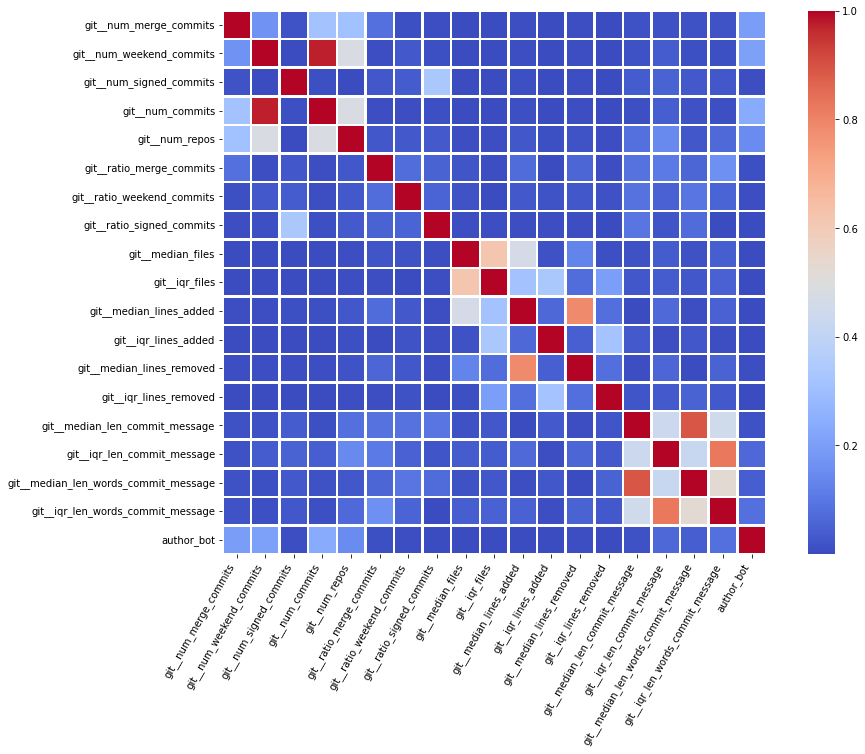

In [12]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(
    df_git_corr_matrix,
    linewidths=1.5,
    square=True,
    xticklabels=True,
    yticklabels=True,
    cmap='coolwarm'
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=60,
    horizontalalignment='right',
);

plt.savefig('eda_corr_heatmap_as_is.png', dpi=600, bbox_inches='tight', pad_inches=1.5, transparent=True)

## Statistical distribution of variables

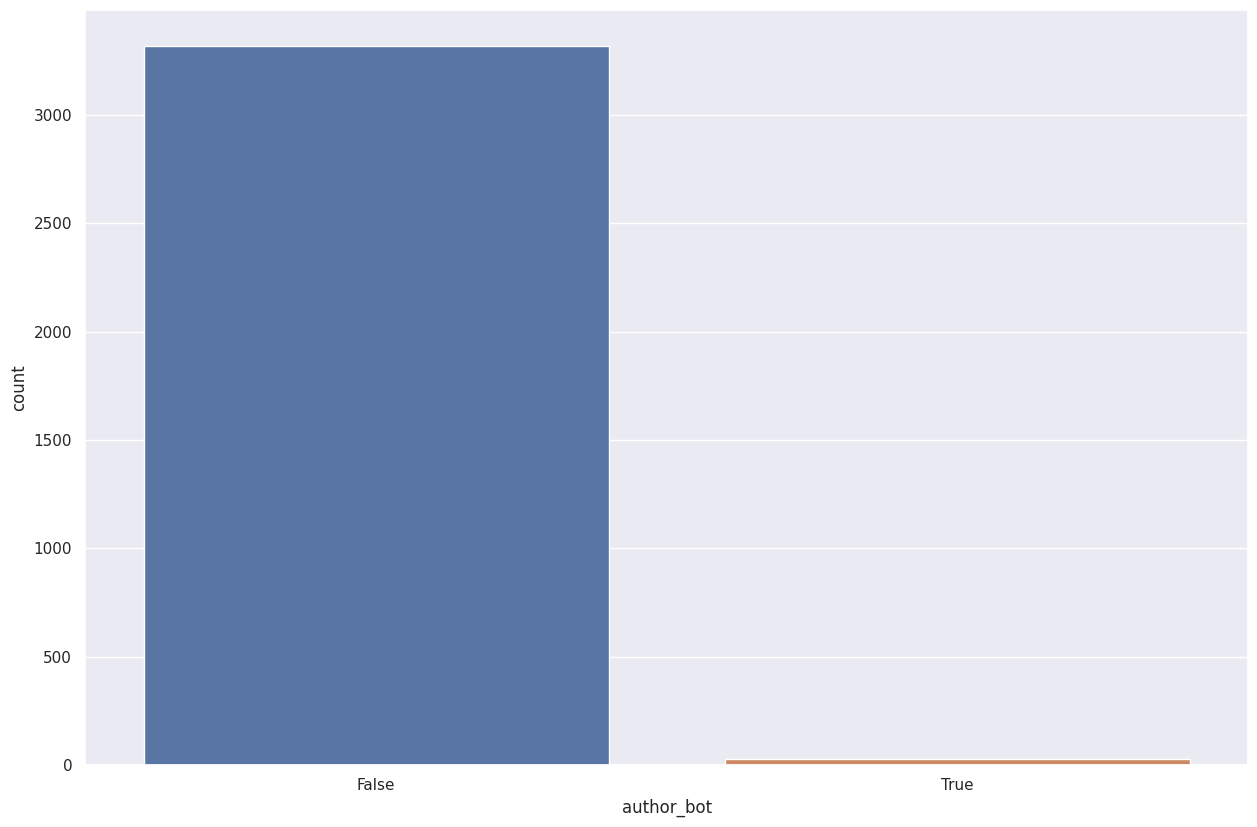

In [13]:
# Documentation: https://seaborn.pydata.org/generated/seaborn.histplot.html
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

plt.figure(figsize=(15, 10), dpi=100)
sns.countplot(data=df_git, x="author_bot")
plt.show()

In [14]:
if REGENERATE_PLOTS:
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    sns.histplot(data=df_git, x="git__num_weekend_commits", discrete=True, stat='frequency', kde=True, color="skyblue", ax=axs[0, 0])
    sns.histplot(data=df_git, x="git__num_merge_commits", discrete=True, stat='frequency', kde=True, color="olive", ax=axs[0, 1])
    sns.histplot(data=df_git, x="git__num_signed_commits", discrete=True, stat='frequency', kde=True, color="gold", ax=axs[1, 1])
    sns.histplot(data=df_git, x="git__num_commits", discrete=True, stat='frequency', kde=True, color="teal", ax=axs[1, 0]).tick_params(axis='x', labelrotation=30)

    plt.show()

In [15]:
if REGENERATE_PLOTS:
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    sns.histplot(data=df_git, x="git__ratio_weekend_commits", stat='frequency', kde=True, color="skyblue", ax=axs[0, 0])
    sns.histplot(data=df_git, x="git__ratio_merge_commits", stat='frequency', kde=True, color="olive", ax=axs[0, 1])
    sns.histplot(data=df_git, x="git__ratio_signed_commits", stat='frequency', kde=True, color="gold", ax=axs[1, 0])
    sns.histplot(data=df_git, x="git__num_repos", discrete=True, stat='frequency', kde=True, color="teal", ax=axs[1, 1]).tick_params(axis='x', labelrotation=30)

    plt.show()

In [16]:
if REGENERATE_PLOTS:
    
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    sns.histplot(data=df_git, x="git__median_files", stat='frequency', kde=True, color="skyblue", ax=axs[0, 0])
    sns.histplot(data=df_git, x="git__iqr_files", stat='frequency', kde=True, color="olive", ax=axs[0, 1])
    sns.histplot(data=df_git, x="git__median_lines_added", stat='frequency', kde=True, color="gold", ax=axs[1, 0])
    sns.histplot(data=df_git, x="git__iqr_lines_added", stat='frequency', kde=True, color="teal", ax=axs[1, 1])

    plt.show()

In [17]:
if REGENERATE_PLOTS:
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    sns.histplot(data=df_git, x="git__median_lines_removed", stat='frequency', kde=True, color="skyblue", ax=axs[0, 0])
    sns.histplot(data=df_git, x="git__iqr_lines_removed", stat='frequency', kde=True, color="olive", ax=axs[0, 1])
    sns.histplot(data=df_git, x="git__median_len_commit_message", stat='frequency', kde=True, color="gold", ax=axs[1, 0])
    sns.histplot(data=df_git, x="git__iqr_len_commit_message", stat='frequency', kde=True, color="teal", ax=axs[1, 1])

    plt.show()

In [18]:
if REGENERATE_PLOTS:
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    sns.histplot(data=df_git, x="git__median_len_words_commit_message", stat='frequency', kde=True, color="skyblue", ax=axs[0])
    sns.histplot(data=df_git, x="git__iqr_len_words_commit_message", stat='frequency', kde=True, color="olive", ax=axs[1])

    plt.show()

## Generate training, test and validation sets

In [19]:
from sklearn.model_selection import train_test_split

# Separate target variable
y_git = df_git.pop('author_bot')

# Divide the Dataset into 60% training and 40% test + validation
X_train_git, X_test_tmp_git,\
y_train_git, y_test_tmp_git = train_test_split(df_git, y_git, test_size=0.4,
                                               random_state=22, stratify=y_git)

# From 40% of the original dataset, 25% is for test and 15% is for validation
# This means we have to split the test+validation set in a 62,5%/37,5% ratio

X_test_git, X_val_git,\
y_test_git, y_val_git = train_test_split(X_test_tmp_git, y_test_tmp_git,
                                         test_size=0.375, random_state=22,
                                         stratify=y_test_tmp_git)

## Detection and processing of missing data

The data is provided by the GrimoireLab toolset, and the dataset is a collection of information from Git commits. The fields and the information per commit is expected to be standard. We are building a custom dataset summarizing information per author. 

In this sense, we are not having missing data except for author-related information, such as the author's name, username or email.

## Correlation: Training dataset

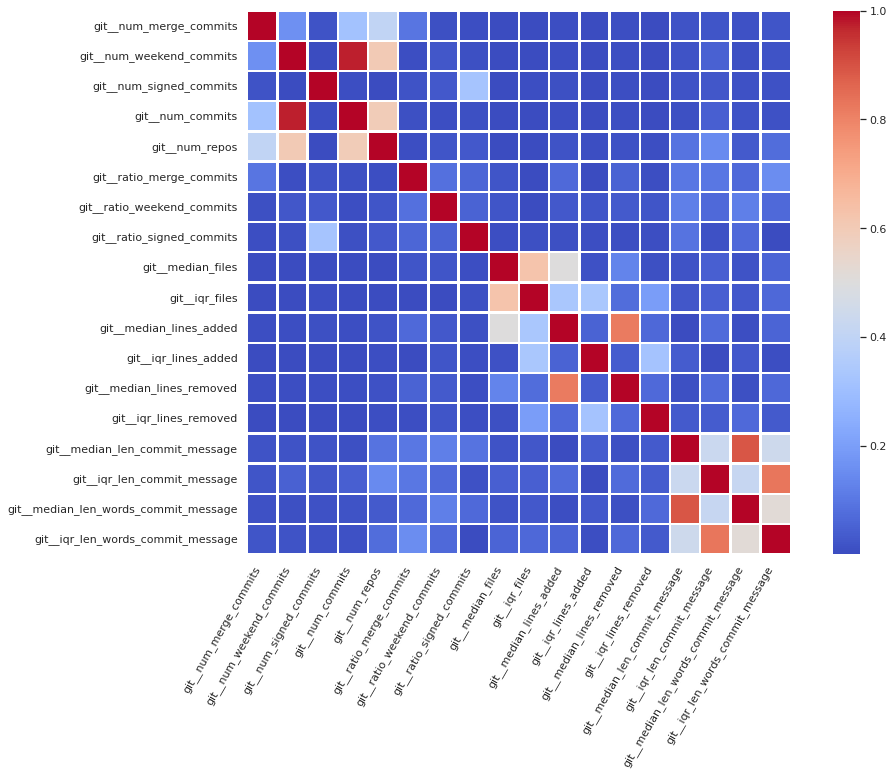

In [20]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(
    X_train_git.corr().abs(),
    linewidths=1.5,
    square=True,
    xticklabels=True,
    yticklabels=True,
    cmap='coolwarm'
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=60,
    horizontalalignment='right',
);

plt.savefig('eda_corr_heatmap_before.png', dpi=600, bbox_inches='tight', pad_inches=1.5, transparent=True)

## Transformation: Quantitative variables

In [21]:
import numpy as np

def log10(x):
    return np.log(x)

def shifted_log10(x):
    return np.log(1 + x)

### Number of commits

In [22]:
X_train_git["git__log_num_commits"] = X_train_git["git__num_commits"].apply(lambda x: log10(x))

In [23]:
if REGENERATE_PLOTS:
    fig, axs = plt.subplots(1, 2, figsize=(15, 8))

    sns.histplot(data=X_train_git, x="git__num_commits", stat='frequency', discrete=True, kde=True, color="skyblue", ax=axs[0])
    sns.histplot(data=X_train_git, x="git__log_num_commits", stat='frequency', kde=True, color="teal", ax=axs[1])

    plt.show()

### Number of merge commits

In [24]:
X_train_git["git__log_num_merge_commits"] = X_train_git["git__num_merge_commits"].apply(lambda x: shifted_log10(x))

In [25]:
if REGENERATE_PLOTS:
    fig, axs = plt.subplots(1, 2, figsize=(15, 8))

    sns.histplot(data=X_train_git, x="git__num_merge_commits", stat='frequency', discrete=True, kde=True, color="skyblue", ax=axs[0])
    sns.histplot(data=X_train_git, x="git__log_num_merge_commits", stat='frequency', kde=True, color="teal", ax=axs[1])

    plt.show()

### Number of weekend commits

In [26]:
X_train_git["git__log_num_weekend_commits"] = X_train_git["git__num_weekend_commits"].apply(lambda x: shifted_log10(x))

In [27]:
if REGENERATE_PLOTS:
    fig, axs = plt.subplots(1, 2, figsize=(15, 8))

    sns.histplot(data=X_train_git, x="git__num_weekend_commits", stat='frequency', discrete=True, kde=True, color="skyblue", ax=axs[0])
    sns.histplot(data=X_train_git, x="git__log_num_weekend_commits", stat='frequency', kde=True, color="teal", ax=axs[1])

    plt.show()

### Number of signed commits

In [28]:
X_train_git["git__log_num_signed_commits"] = X_train_git["git__num_signed_commits"].apply(lambda x: shifted_log10(x))

In [29]:
if REGENERATE_PLOTS:
    fig, axs = plt.subplots(1, 2, figsize=(15, 8))

    sns.histplot(data=X_train_git, x="git__num_signed_commits", stat='frequency', discrete=True, kde=True, color="skyblue", ax=axs[0])
    sns.histplot(data=X_train_git, x="git__log_num_signed_commits", stat='frequency', kde=True, color="teal", ax=axs[1])

    plt.show()

### Number of repositories

In [30]:
X_train_git["git__log_num_repos"] = X_train_git["git__num_repos"].apply(lambda x: log10(x))

In [31]:
if REGENERATE_PLOTS:
    fig, axs = plt.subplots(1, 2, figsize=(15, 8))

    sns.histplot(data=X_train_git, x="git__num_repos", stat='frequency', discrete=True, kde=True, color="skyblue", ax=axs[0])
    sns.histplot(data=X_train_git, x="git__log_num_repos", stat='frequency', kde=True, color="teal", ax=axs[1])

    plt.show()

### Ratio of merge commits

In [32]:
X_train_git["git__sqrt_ratio_merge_commits"] = X_train_git["git__ratio_merge_commits"].apply(lambda x: np.sqrt(x))

In [33]:
if REGENERATE_PLOTS:
    fig, axs = plt.subplots(1, 2, figsize=(15, 8))

    sns.histplot(data=X_train_git, x="git__ratio_merge_commits", stat='frequency', kde=True, color="skyblue", ax=axs[0])
    sns.histplot(data=X_train_git, x="git__sqrt_ratio_merge_commits", stat='frequency', kde=True, color="teal", ax=axs[1])

    plt.show()

### Ratio of weekend commits

In [34]:
X_train_git["git__sqrt_ratio_weekend_commits"] = X_train_git["git__ratio_weekend_commits"].apply(lambda x: np.sqrt(x))

In [35]:
if REGENERATE_PLOTS:
    fig, axs = plt.subplots(1, 2, figsize=(15, 8))

    sns.histplot(data=X_train_git, x="git__ratio_weekend_commits", stat='frequency', kde=True, color="skyblue", ax=axs[0])
    sns.histplot(data=X_train_git, x="git__sqrt_ratio_weekend_commits", stat='frequency', kde=True, color="teal", ax=axs[1])

    plt.show()

### Ratio of signed commits

In [36]:
X_train_git["git__sqrt_ratio_signed_commits"] = X_train_git["git__ratio_signed_commits"].apply(lambda x: np.sqrt(x))

In [37]:
if REGENERATE_PLOTS:
    fig, axs = plt.subplots(1, 2, figsize=(15, 8))

    sns.histplot(data=X_train_git, x="git__ratio_signed_commits", stat='frequency', kde=True, color="skyblue", ax=axs[0])
    sns.histplot(data=X_train_git, x="git__sqrt_ratio_signed_commits", stat='frequency', kde=True, color="teal", ax=axs[1])

    plt.show()

This variable will be trasformed into a binary variable: "has signed commits".

### Number of files modified

#### Median

In [38]:
X_train_git["git__log_median_files"] = X_train_git["git__median_files"].apply(lambda x: shifted_log10(x))

In [39]:
if REGENERATE_PLOTS:
    fig, axs = plt.subplots(1, 2, figsize=(15, 8))

    sns.histplot(data=X_train_git, x="git__median_files", stat='frequency', kde=True, color="skyblue", ax=axs[0])
    sns.histplot(data=X_train_git, x="git__log_median_files", stat='frequency', kde=True, color="teal", ax=axs[1])

    plt.show()

#### Interquartilic range

In [40]:
X_train_git["git__log_iqr_files"] = X_train_git["git__iqr_files"].apply(lambda x: shifted_log10(x))

In [41]:
if REGENERATE_PLOTS:
    fig, axs = plt.subplots(1, 2, figsize=(15, 8))

    sns.histplot(data=X_train_git, x="git__iqr_files", stat='frequency', kde=True, color="skyblue", ax=axs[0])
    sns.histplot(data=X_train_git, x="git__log_iqr_files", stat='frequency', kde=True, color="teal", ax=axs[1])

    plt.show()

### Number of lines added

#### Median

In [42]:
X_train_git["git__log_median_lines_added"] = X_train_git["git__median_lines_added"].apply(lambda x: shifted_log10(x))

In [43]:
if REGENERATE_PLOTS:
    fig, axs = plt.subplots(1, 2, figsize=(15, 8))

    sns.histplot(data=X_train_git, x="git__median_lines_added", stat='frequency', kde=True, color="skyblue", ax=axs[0])
    sns.histplot(data=X_train_git, x="git__log_median_lines_added", stat='frequency', kde=True, color="teal", ax=axs[1])

    plt.show()

#### Interquartilic range

In [44]:
X_train_git["git__log_iqr_lines_added"] = X_train_git["git__iqr_lines_added"].apply(lambda x: shifted_log10(x))

In [45]:
if REGENERATE_PLOTS:
    fig, axs = plt.subplots(1, 2, figsize=(15, 8))

    sns.histplot(data=X_train_git, x="git__iqr_lines_added", stat='frequency', kde=True, color="skyblue", ax=axs[0])
    sns.histplot(data=X_train_git, x="git__log_iqr_lines_added", stat='frequency', kde=True, color="teal", ax=axs[1])

    plt.show()

### Number of lines removed

#### Median

In [46]:
X_train_git["git__log_median_lines_removed"] = X_train_git["git__median_lines_removed"].apply(lambda x: shifted_log10(x))

In [47]:
if REGENERATE_PLOTS:
    fig, axs = plt.subplots(1, 2, figsize=(15, 8))

    sns.histplot(data=X_train_git, x="git__median_lines_removed", stat='frequency', kde=True, color="skyblue", ax=axs[0])
    sns.histplot(data=X_train_git, x="git__log_median_lines_removed", stat='frequency', kde=True, color="teal", ax=axs[1])

    plt.show()

#### Interquartilic range

In [48]:
X_train_git["git__log_iqr_lines_removed"] = X_train_git["git__iqr_lines_removed"].apply(lambda x: shifted_log10(x))

In [49]:
if REGENERATE_PLOTS:
    fig, axs = plt.subplots(1, 2, figsize=(15, 8))

    sns.histplot(data=X_train_git, x="git__iqr_lines_removed", stat='frequency', kde=True, color="skyblue", ax=axs[0])
    sns.histplot(data=X_train_git, x="git__log_iqr_lines_removed", stat='frequency', kde=True, color="teal", ax=axs[1])

    plt.show()

### Length of commit message

#### Median

In [50]:
X_train_git["git__log_median_len_commit_message"] = X_train_git["git__median_len_commit_message"].apply(lambda x: shifted_log10(x))

In [51]:
if REGENERATE_PLOTS:
    fig, axs = plt.subplots(1, 2, figsize=(15, 8))

    sns.histplot(data=X_train_git, x="git__median_len_commit_message", stat='frequency', kde=True, color="skyblue", ax=axs[0])
    sns.histplot(data=X_train_git, x="git__log_median_len_commit_message", stat='frequency', kde=True, color="teal", ax=axs[1])

    plt.show()

#### Interquartilic range

In [52]:
X_train_git["git__log_iqr_len_commit_message"] = X_train_git["git__iqr_len_commit_message"].apply(lambda x: shifted_log10(x))

In [53]:
if REGENERATE_PLOTS:
    fig, axs = plt.subplots(1, 2, figsize=(15, 8))

    sns.histplot(data=X_train_git, x="git__iqr_len_commit_message", stat='frequency', kde=True, color="skyblue", ax=axs[0])
    sns.histplot(data=X_train_git, x="git__log_iqr_len_commit_message", stat='frequency', kde=True, color="teal", ax=axs[1])

    plt.show()

### Length of commit message, number of words

#### Median

In [54]:
X_train_git["git__log_median_len_words_commit_message"] = X_train_git["git__median_len_words_commit_message"].apply(lambda x: shifted_log10(x))

In [55]:
if REGENERATE_PLOTS:
    fig, axs = plt.subplots(1, 2, figsize=(15, 8))

    sns.histplot(data=X_train_git, x="git__median_len_words_commit_message", stat='frequency', kde=True, color="skyblue", ax=axs[0])
    sns.histplot(data=X_train_git, x="git__log_median_len_words_commit_message", stat='frequency', kde=True, color="teal", ax=axs[1])

    plt.show()

#### Interquartilic range

In [56]:
X_train_git["git__log_iqr_len_words_commit_message"] = X_train_git["git__iqr_len_words_commit_message"].apply(lambda x: shifted_log10(x))

In [57]:
if REGENERATE_PLOTS:
    fig, axs = plt.subplots(1, 2, figsize=(15, 8))

    sns.histplot(data=X_train_git, x="git__iqr_len_words_commit_message", stat='frequency', kde=True, color="skyblue", ax=axs[0])
    sns.histplot(data=X_train_git, x="git__log_iqr_len_words_commit_message", stat='frequency', kde=True, color="teal", ax=axs[1])

    plt.show()

## Transformation: Cualitative variables

## Tests

In [58]:
df_train_x_git_corr_matrix = X_train_git.corr().abs()
df_train_x_git_corr_matrix

,git__num_merge_commits,git__num_weekend_commits,git__num_signed_commits,git__num_commits,git__num_repos,git__ratio_merge_commits,git__ratio_weekend_commits,git__ratio_signed_commits,git__median_files,git__iqr_files,...,git__log_median_files,git__log_iqr_files,git__log_median_lines_added,git__log_iqr_lines_added,git__log_median_lines_removed,git__log_iqr_lines_removed,git__log_median_len_commit_message,git__log_iqr_len_commit_message,git__log_median_len_words_commit_message,git__log_iqr_len_words_commit_message
git__num_merge_commits,1.000000,0.163957,0.018104,0.314331,0.405062,0.095211,0.011184,0.007026,0.002040,0.001452,...,0.058564,0.009369,0.058885,0.052981,0.047509,0.039912,0.009913,0.016269,0.006777,0.016382
git__num_weekend_commits,0.163957,1.000000,0.001834,0.975245,0.601928,0.004680,0.027484,0.009562,0.001759,0.000610,...,0.017455,0.033336,0.041601,0.033182,0.025146,0.048206,0.022252,0.034839,0.007851,0.020519
git__num_signed_commits,0.018104,0.001834,1.000000,0.007247,0.000759,0.017731,0.031217,0.323771,0.003082,0.004620,...,0.001716,0.005649,0.019376,0.005092,0.005439,0.011300,0.037500,0.028851,0.032143,0.021794
git__num_commits,0.314331,0.975245,0.007247,1.000000,0.596418,0.011010,0.005431,0.010732,0.000419,0.000380,...,0.026057,0.033107,0.049623,0.038638,0.031378,0.052069,0.020202,0.034237,0.011247,0.019962
git__num_repos,0.405062,0.601928,0.000759,0.596418,1.000000,0.007589,0.021307,0.029317,0.003463,0.002242,...,0.055844,0.062524,0.099643,0.090054,0.078561,0.079835,0.102274,0.119039,0.052786,0.083569
git__ratio_merge_commits,0.095211,0.004680,0.017731,0.011010,0.007589,1.000000,0.082828,0.060828,0.023178,0.002390,...,0.475379,0.157989,0.512856,0.463297,0.439172,0.387793,0.021687,0.065038,0.010239,0.119709
git__ratio_weekend_commits,0.011184,0.027484,0.031217,0.005431,0.021307,0.082828,1.000000,0.053635,0.020284,0.000731,...,0.044435,0.066474,0.023587,0.010246,0.008283,0.002560,0.145416,0.072556,0.145981,0.087266
git__ratio_signed_commits,0.007026,0.009562,0.323771,0.010732,0.029317,0.060828,0.053635,1.000000,0.005861,0.009199,...,0.036061,0.023293,0.052527,0.058596,0.055881,0.058549,0.115589,0.010774,0.093970,0.001249
git__median_files,0.002040,0.001759,0.003082,0.000419,0.003463,0.023178,0.020284,0.005861,1.000000,0.625935,...,0.502473,0.281413,0.176420,0.104081,0.035758,0.110393,0.011795,0.069863,0.017926,0.113501
git__iqr_files,0.001452,0.000610,0.004620,0.000380,0.002242,0.002390,0.000731,0.009199,0.625935,1.000000,...,0.434606,0.451444,0.160148,0.200324,0.062233,0.213999,0.024343,0.058980,0.032096,0.115431


In [59]:
vars_subset = ['git__log_num_commits',
               'git__log_num_merge_commits',
               'git__log_num_weekend_commits',
               'git__log_num_signed_commits',
               'git__log_num_repos',
               'git__sqrt_ratio_merge_commits',
               'git__sqrt_ratio_weekend_commits',
               'git__sqrt_ratio_signed_commits',
               'git__log_median_files',
               'git__log_iqr_files',
               'git__log_median_lines_added',
               'git__log_iqr_lines_added',
               'git__log_median_lines_removed',
               'git__log_iqr_lines_removed',
               'git__log_median_len_commit_message',
               'git__log_iqr_len_commit_message',
               'git__log_median_len_words_commit_message',
               'git__log_iqr_len_words_commit_message']

### Generate binary variables

#### Transform biased variables

Most of the variables from this data-set are quantitative. Nonetheless, the statistical distribution of some of them points a need to generate qualitative, binary variables derived from them.
These variables have a high bias. Looking at the statistical distribution, the general rule is observing a high peak in "0" value and then the rest of the results are spread over the histogram. 

For this reason, these variables are transformed into binary variables. This transformation also makes sense in a conceptual way. For instance, looking at the number of merge commits, instead of counting how many of them there are, it is more meaningful knowing if a given author submitted merge commits or not.

The variables transformed into binary are:

| Former field | Transformed field | Meaning |
| ------------ | ----------------- | ------- |
| `git__num_merge_commits` | `git__has_merge_commits` | "1" if a given author has submitted at least 1 merge commit. "0" otherwise |
| `git__num_weekend_commits` | `git__has_weekend_commits` | "1" if a given author has submitted at least 1 commit during weekends (Saturday or Sunday). "0" otherwise |
| `git__num_signed_commits` | `git__has_signed_commits` | "1" if a given author has submitted at least 1 signed commit. "0" otherwise |
| `git__median_lines_added` | `git__mostly_not_adding_lines` | "1" if the median of added lines for that author is "0" (this author is not adding lines in at least 50% of the commits), "0" otherwise |
| `git__median_lines_removed` | `git__mostly_not_removing_lines` | "1" if the median of removed lines for that author is "0" (this author is not removing lines in at least 50% of the commits), "0" otherwise |


#### Heuristic terms

The heuristic terms in the table belong to the application domain, using terminology of the tasks the bots are usually performing in software repositories. With these terms, a set of dummy variables is created with one column per term, where the value is "1" (**True**) when the term from that column is included in the author's name; and "0" (**False**) if is not included. For instance, a user named `ghmerger` would have a "1" value in the `merge` and `merger` columns, and a "0" value in the rest of the columns.

Additionaly, there is another binary variable summarizing if the author name contains any of these terms: `git__author_name_has_term`.

| Heuristic terms |
| --------------- |
| `auto`, `bot`, `build`, `cd`, `ci`, `code`, `commit`, `copy`, `dependency`
  `fix`, `integration`, `issue`, `merge`, `patrol`, `pr`, `pull`, 
  `release`, `request`, `review`, `sync`, `template`, `tool`, `travis`|

In [60]:
heuristic_terms = ['bot', 'ci', 'cd', 'build', 'auto', 'travis', 'copy',
                   'dependency', 'fix', 'merge', 'template', 'sync',
                   'integration', 'release', 'code', 'review', 'tool',
                   'patrol', 'issue', 'pr', 'pull', 'request', 'commit']

terms_l1 = ['bot', 'dependency', 'fix', 'integration', 'merge']
terms_l2 = ['auto', 'build', 'commit', 'copy', 'issue', 'release',
            'request', 'review', 'sync', 'template', 'tool', 'travis']
terms_l3 = ['cd', 'ci', 'code', 'patrol', 'pr', 'pull']

def compute_terms_score(x, terms):
    score = 0
    n_l1 = 0
    n_l2 = 0
    n_l3 = 0
    for term in terms:
        if term.lower() in x.lower():
            if term in terms_l1:
                n_l1 += 1
            elif term in terms_l2:
                n_l2 += 1
            elif term in terms_l3:
                n_l3 += 1
    score = 60*n_l1 + 30*n_l2 + 10*n_l3
    # norm_score = (100*score)/720
    return score

def str_has_heuristic(x, terms):
    for term in terms:
        if term in x:
            return 1
    return 0

def produce_dummy_terms(author_name, terms):
    list_terms = []
    for term in terms:
        value = 0
        term = str(term)
        author_name = str(author_name)
        if term.lower() in author_name.lower():
            value = 1
        list_terms.append(value)
    return pd.Series(list_terms)


In [61]:
X_train_git['git__has_merge_commits'] = (X_train_git['git__num_merge_commits'] > 0).astype(int)
X_train_git['git__has_weekend_commits'] = (X_train_git['git__num_weekend_commits'] > 0).astype(int)
X_train_git['git__has_signed_commits'] = (X_train_git['git__num_signed_commits'] > 0).astype(int)
# FIXME
X_train_git['git__mostly_not_adding_lines'] = (X_train_git['git__median_lines_added'] == 0).astype(int)
X_train_git['git__mostly_not_removing_lines'] = (X_train_git['git__median_lines_removed'] == 0).astype(int)

# FIXME
vars_subset += ['git__has_merge_commits',
                'git__has_weekend_commits',
                'git__has_signed_commits',
                'git__mostly_not_adding_lines',
                'git__mostly_not_removing_lines']

In [62]:
X_train_git['terms_score'] = X_train_git['author_name'].apply(lambda x: compute_terms_score(x, heuristic_terms))
vars_subset += ['terms_score']

In [63]:
if REGENERATE_PLOTS:
    fig = plt.figure(figsize=(8,8))

    sns.histplot(data=X_train_git, x="terms_score", stat='frequency', kde=True, color="skyblue")

    plt.show()

In [64]:
X_train_git["log_terms_score"] = X_train_git["terms_score"].apply(lambda x: shifted_log10(x))

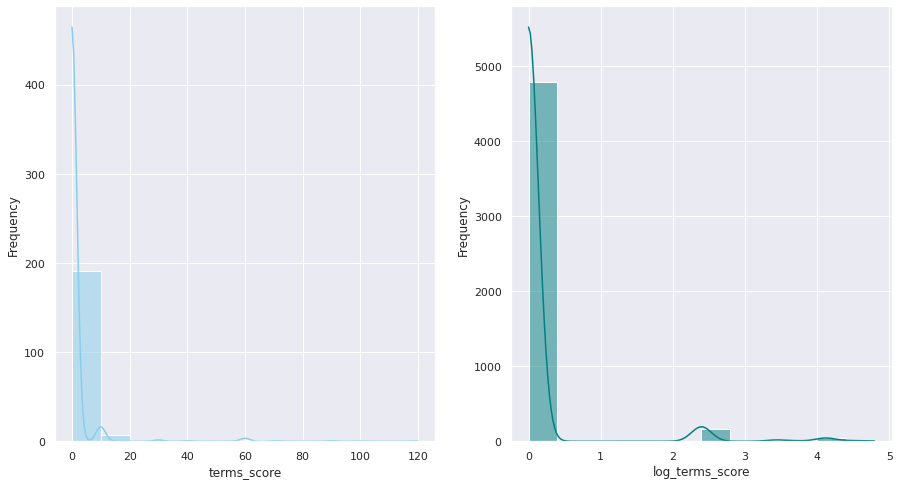

In [65]:

fig, axs = plt.subplots(1, 2, figsize=(15, 8))

sns.histplot(data=X_train_git, x="terms_score", stat='frequency', kde=True, color="skyblue", ax=axs[0])
sns.histplot(data=X_train_git, x="log_terms_score", stat='frequency', kde=True, color="teal", ax=axs[1])

plt.show()

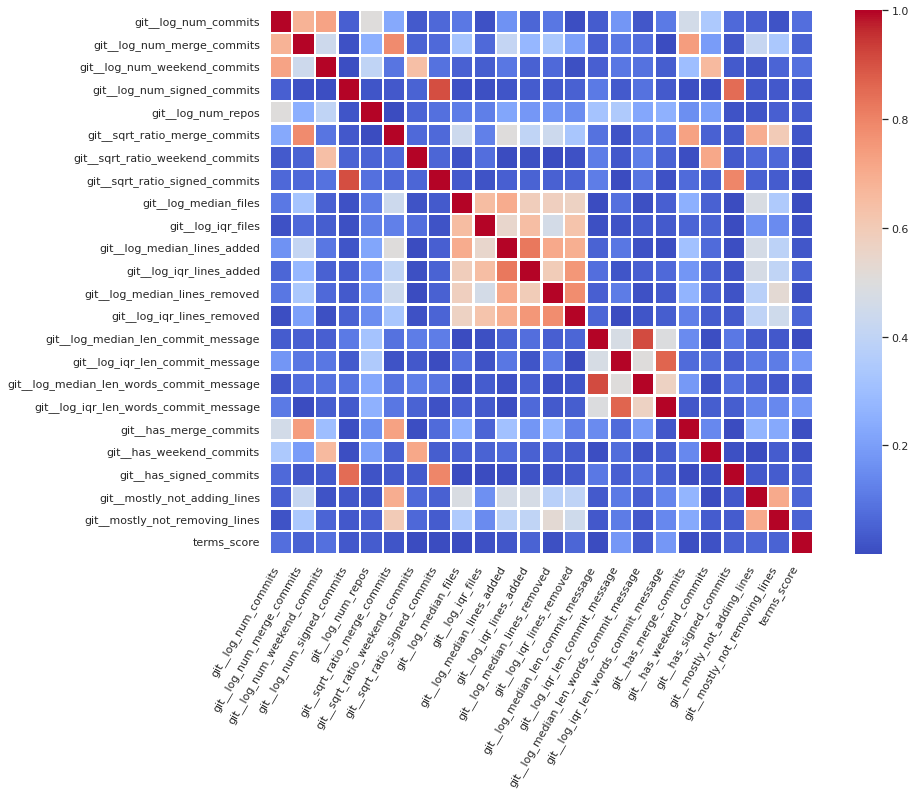

In [66]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(
    X_train_git[vars_subset].corr().abs(),
    linewidths=1.5,
    square=True,
    xticklabels=True,
    yticklabels=True,
    cmap='coolwarm'
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=60,
    horizontalalignment='right',
);

plt.savefig('eda_corr_heatmap_after.png', dpi=600, bbox_inches='tight', pad_inches=1.5, transparent=True)

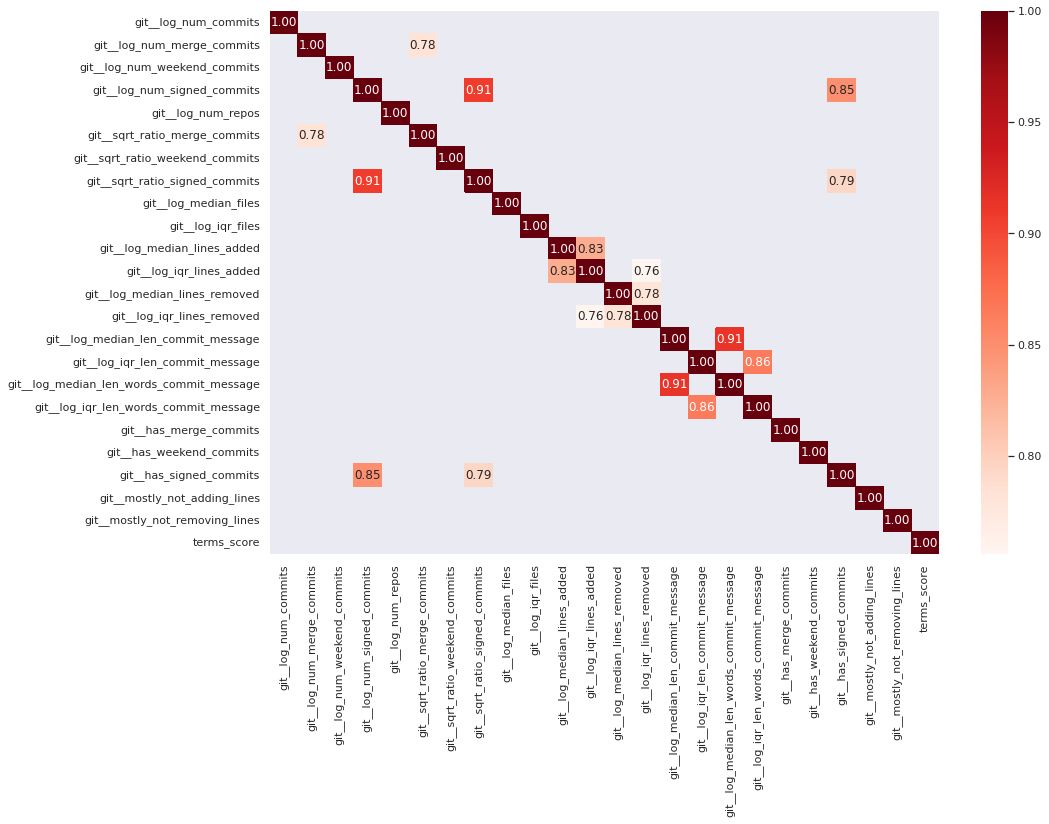

In [67]:
dfcorr = X_train_git[vars_subset].corr().abs()

kot = dfcorr[dfcorr>=.75]
plt.figure(figsize=(15, 10))
sns.heatmap(kot, cmap="Reds", annot=True, fmt=".2f")

plt.savefig('eda_corr_heatmap_more_75.png', dpi=600, bbox_inches='tight', pad_inches=1.5, transparent=True)

In [68]:
# Dropping variables with higher correlation

drop_cols = [
    'git__sqrt_ratio_merge_commits',
    'git__sqrt_ratio_weekend_commits',
    'git__sqrt_ratio_signed_commits',
    'git__log_iqr_lines_added',
    'git__log_iqr_lines_removed',
    'git__log_iqr_len_commit_message',
    'git__log_median_len_words_commit_message',
    'git__has_merge_commits',
    'git__has_weekend_commits',
    'git__has_signed_commits',
    'git__mostly_not_adding_lines',
    'git__mostly_not_removing_lines',
]
X_train_git = X_train_git[vars_subset].drop(columns=drop_cols)

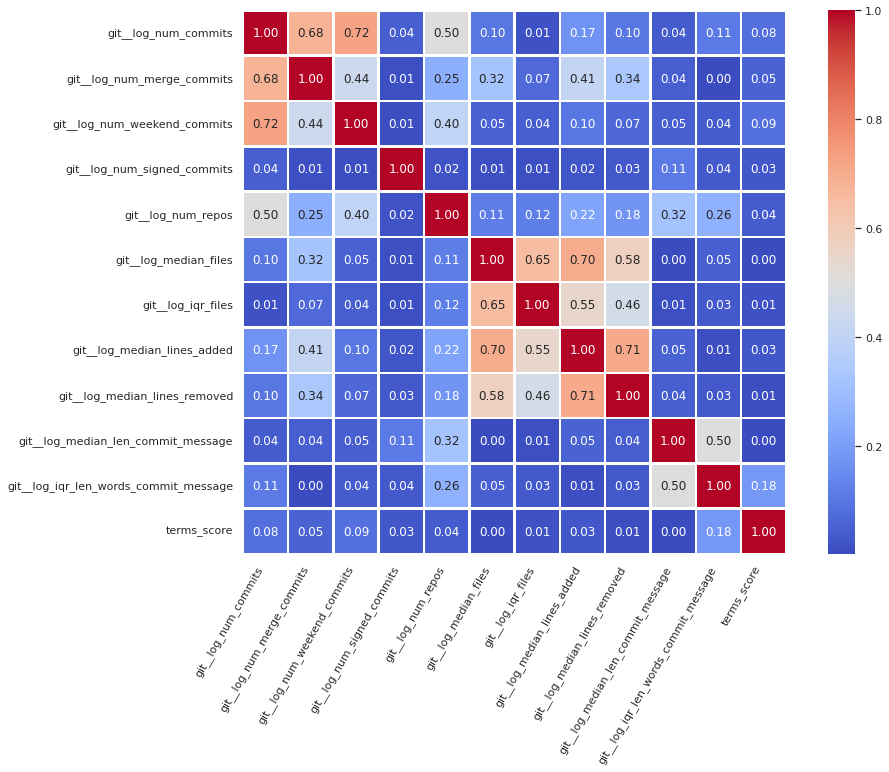

In [69]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(
    X_train_git.corr().abs(),
    linewidths=1.5,
    square=True,
    xticklabels=True,
    yticklabels=True,
    cmap='coolwarm',
    annot=True,
    fmt=".2f"
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=60,
    horizontalalignment='right',
);

plt.savefig('eda_corr_heatmap_correlation_fixed.png', dpi=600, bbox_inches='tight', pad_inches=1.5, transparent=True)

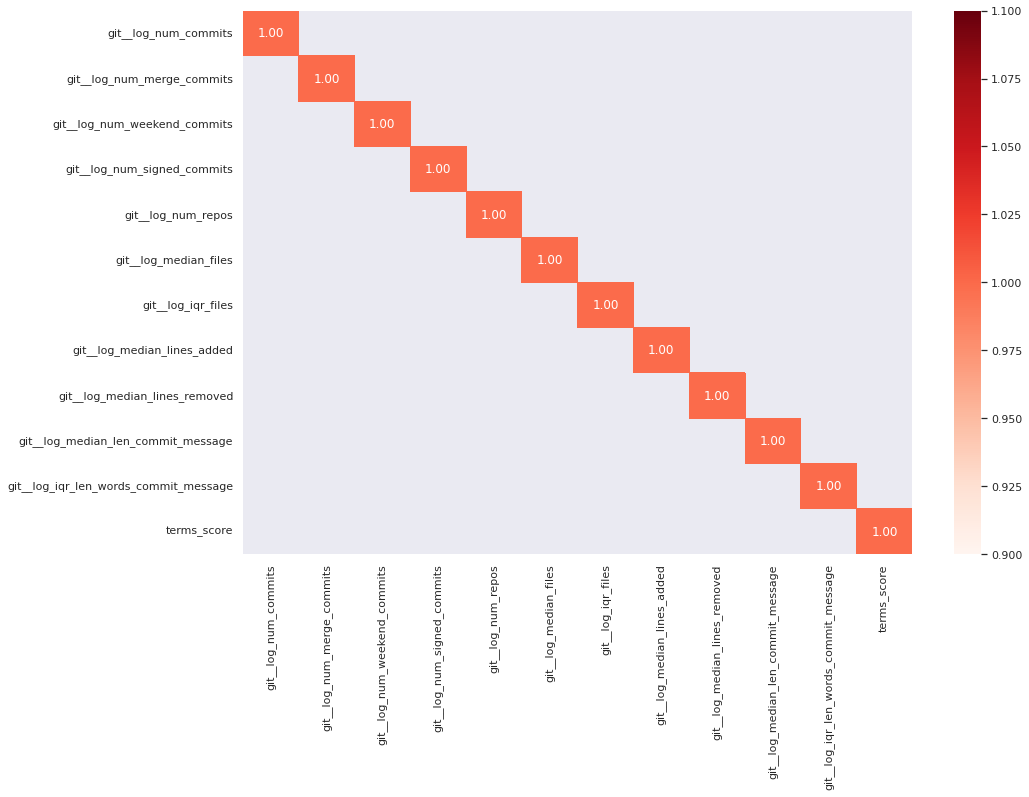

In [70]:
dfcorr2 = X_train_git.corr().abs()

kot = dfcorr2[dfcorr2>=.75]
plt.figure(figsize=(15, 10))
sns.heatmap(kot, cmap="Reds", annot=True, fmt=".2f")

plt.savefig('eda_corr_heatmap_more_75_fixed.png', dpi=600, bbox_inches='tight', pad_inches=1.5, transparent=True)